In [164]:
%matplotlib inline

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn import datasets

In [166]:
rng = RandomState(0)
faces, _ = datasets.fetch_olivetti_faces(return_X_y = True, shuffle = True, random_state = rng)
sizex = len(faces)
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [167]:
faces_centered.shape

(400, 4096)

In [168]:
def plot(imagem):
    plt.figure()
    for i, comp in enumerate(imagem):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                       interpolation='nearest',
                       vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        if i == (n_row*n_col)-1:
            break
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [169]:
W = np.random.rand(1,faces.shape[1])

In [170]:
def online(a):
    global faces_centered
    global W
    global sizex
    a = a
    Want = W
    cont = it = 0
    ww = list()
    for n in range(sizex):
        y = (W).dot(faces_centered[n,:])
        c = (faces_centered[n,:].T)*(y)
        d = y*y*(W)
        dw = a*(c - d)
        Want = W
        W= W+dw
        cont = cont+1
        ww.append(W[0])
    plt.plot(ww)
    return W

array([[-0.02397171, -0.02548869, -0.02884628, ...,  0.00611743,
         0.0054762 ,  0.00279811]])

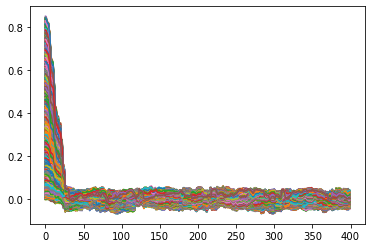

In [171]:
A = online(0.01)
A

In [172]:
Y = faces_centered.T*A.T
Y.shape

(4096, 400)

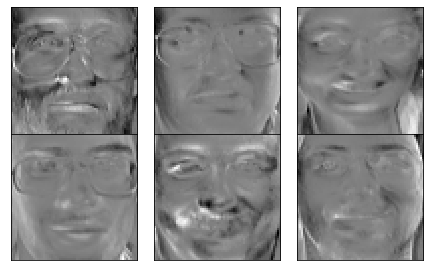

In [173]:
plot(Y.T)